In [14]:
library(ggpubr)

In [15]:
library(tidyverse)

In [16]:
library(openxlsx)

In [17]:
EAC <- readRDS("/disk1/pengweixing/TCGA/01.EAC/01.survival/ERBB2_Ade.Rdata")
ESCC <- readRDS("/disk1/pengweixing/TCGA/01.EAC/01.survival/ERBB2_Squ.Rdata")

In [18]:
GCA <- readRDS('GCA_her2_RNA.Rdata')

In [19]:
GCA <- as.data.frame(GCA)

In [20]:
GCA$Type <- "GCA"

In [21]:
EAC$Type <- "EAC"
ESCC$Type <- "ESCC"

In [22]:
GAS <- readRDS('/disk1/pengweixing/TCGA/02.GAS/GAS.ERBB2.Rdata')

In [23]:
GAS <- GAS[,c(2,3)]

In [24]:
colnames(GAS) <- c("ERBB2","Type")

In [25]:
GAS_all <- GAS

In [26]:
GAS_all$Type <- "GAS_all"

In [27]:
GAS_all <- GAS_all[]

In [28]:
head(GAS_all)

,ERBB2,Type
,<dbl>,<chr>
677,30.7979,GAS_all
847,95.6066,GAS_all
389,82.1864,GAS_all
269,97.5116,GAS_all
327,49.6426,GAS_all
311,21.1436,GAS_all


In [29]:
head(GCA)

,ERBB2,Type
,<dbl>,<chr>
9DW0030,32.31764,GCA
9DW0038,17.54263,GCA
9DW0039,22.25386,GCA
9DW0049,12.25802,GCA
9DW0052,32.53602,GCA
9DW0056,27.77664,GCA


In [30]:
head(EAC)

,ERBB2,Type
,<dbl>,<chr>
TCGA-2H-A9GF,4575.8588,EAC
TCGA-2H-A9GG,6.2382,EAC
TCGA-2H-A9GH,90.1298,EAC
TCGA-2H-A9GI,277.6609,EAC
TCGA-2H-A9GJ,122.9373,EAC
TCGA-2H-A9GK,47.0287,EAC


In [31]:
data <- rbind(GCA,EAC,ESCC,GAS,GAS_all)

In [32]:
head(data)

,ERBB2,Type
,<dbl>,<chr>
9DW0030,32.31764,GCA
9DW0038,17.54263,GCA
9DW0039,22.25386,GCA
9DW0049,12.25802,GCA
9DW0052,32.53602,GCA
9DW0056,27.77664,GCA


In [33]:
p1 <- ggboxplot(data,x="Type",y="ERBB2",fill="white",add="jitter",
          add.params=list(shape=21, fill="orange", size=3)) + xlab("")

In [34]:
data$ERBB2_log <- log2(data$ERBB2)

In [35]:
p2 <- ggboxplot(data,x="Type",y="ERBB2_log",fill="white",add="jitter",
          add.params=list(shape=21, fill="orange", size=3)) + xlab("")

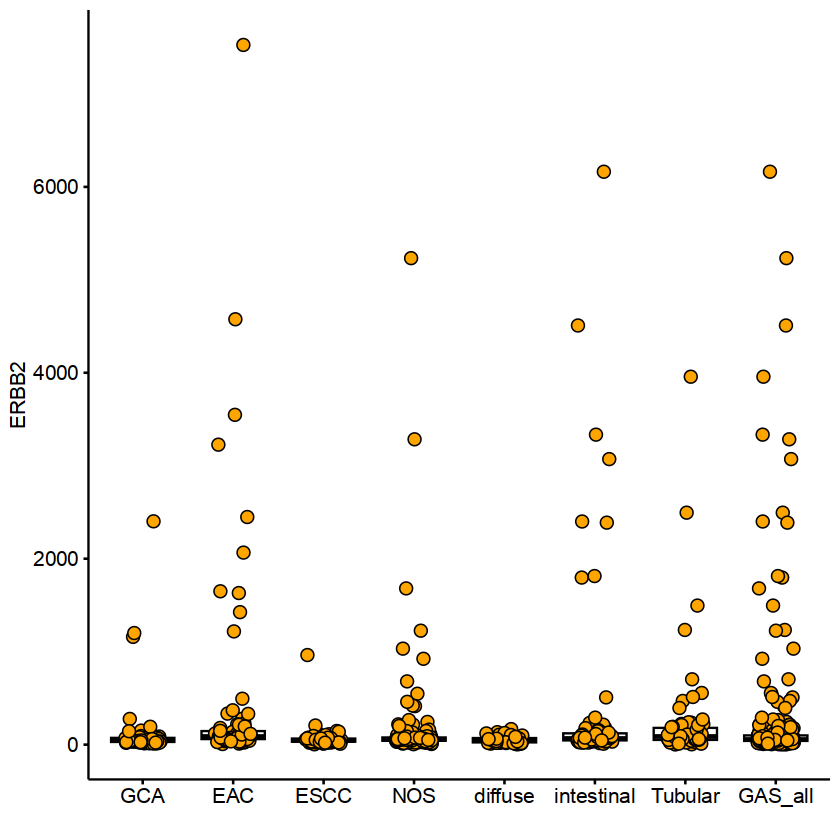

In [36]:
p1

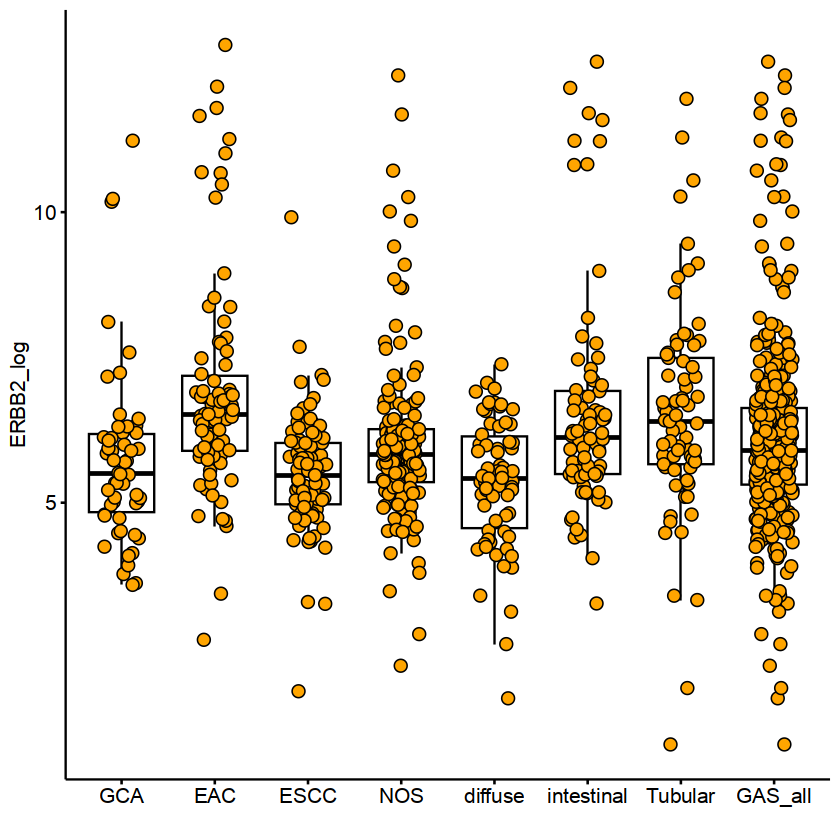

In [37]:
p2

In [136]:
#ggsave(filename = "HER2_box_for_alltumor/HER2_TPM_boxplot.pdf",plot = p1,width = 8,height = 6)

In [39]:
ggsave(filename = "HER2_log2tpm_boxplot.pdf",plot = p2,width = 8,height = 6)

In [40]:
data %>% group_by(Type) %>% summarise(median = median(ERBB2), n = n()) -> median_stat

In [41]:
write.xlsx(x = median_stat,file = "HER2.median.box.xlsx")